| Luis Alejandro Rodríguez González |
| :---: |
| A01637333@itesm.mx |

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [2]:
# url string that hosts our .csv file
path = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(path, header=None)
df.columns = ["sepalLength", "sepalWidth", "petalLength","petalWidth", "class"]

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
print(df.shape)
df.head()

(150, 5)


,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [4]:
df = df.dropna()
print(df.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column
df = df.replace({"class": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}})

#Visualize the dataset
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


4. Discard columns that won't be used


In [6]:
# Drop out non necesary columns
df.drop(["sepalLength", "sepalWidth"], axis="columns", inplace=True)

#Visualize the dataset
df.head()


,petalLength,petalWidth,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


4. Scatter plot of the data

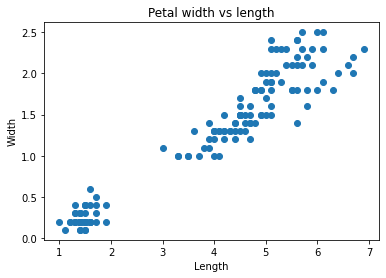

In [10]:
plt.scatter(df.petalLength,df.petalWidth)
plt.title('Petal width vs length')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

5. Scatter plot of the data asigning each point to the cluster it belongs to

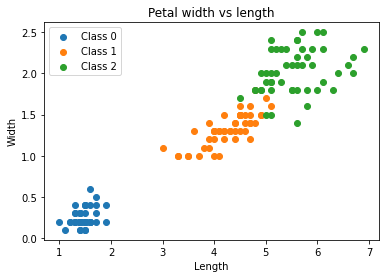

In [15]:
df0 = df[df["class"]==0]
df1 = df[df["class"]==1]
df2 = df[df["class"]==2]

plt.scatter(df0.petalLength, df0.petalWidth, label='Class 0')
plt.scatter(df1.petalLength, df1.petalWidth, label='Class 1')
plt.scatter(df2.petalLength, df2.petalWidth, label='Class 2')

plt.title('Petal width vs length')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [16]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(df[['petalLength','petalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [17]:
# Add a new column to the dataset with the cluster information
df['cluster'] = yp

# Visualize the dataset
df.head()

,petalLength,petalWidth,class,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


In [21]:
# Visualize the ID of the clusters
df.cluster.unique()

array([1, 0, 2], dtype=int32)

In [22]:
# Center of each cluster
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [23]:
# Sum of squared error
km.inertia_

31.371358974358976

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

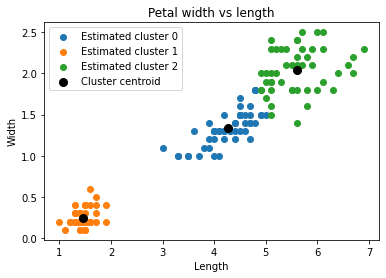

In [34]:
df0 = df[df["cluster"]==0]
df1 = df[df["cluster"]==1]
df2 = df[df["cluster"]==2]

plt.scatter(df0.petalLength, df0.petalWidth, label='Estimated cluster 0')
plt.scatter(df1.petalLength, df1.petalWidth, label='Estimated cluster 1')
plt.scatter(df2.petalLength, df2.petalWidth, label='Estimated cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='.', label='Cluster centroid', s=256)

plt.title('Petal width vs length')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Plot real clusters and visual comparison

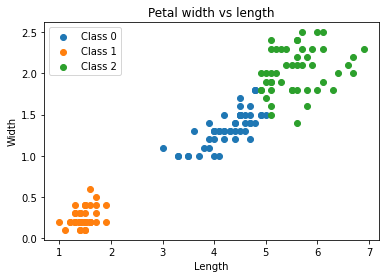

In [35]:
plt.scatter(df0.petalLength, df0.petalWidth, label='Class 0')
plt.scatter(df1.petalLength, df1.petalWidth, label='Class 1')
plt.scatter(df2.petalLength, df2.petalWidth, label='Class 2')

plt.title('Petal width vs length')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [36]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['petalLength','petalWidth']])
    sse.append(km.inertia_)

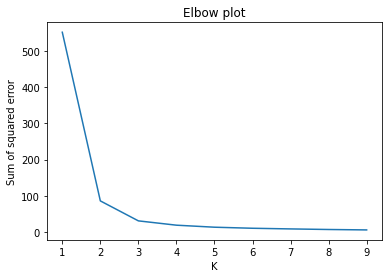

In [37]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the elbow plot, the selected K (3 clusters) is ideal because any higher values do not pronouncedly decrease the sum of squared errors, it agrees with the actual number of classes and accordingly classifies them.


# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset
    
- Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.

- Compute and show the elbow plot

- Draw conclusions:

    - About the elbow plot: does the K agree with the real number of clusters?
    
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?